In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_US_DA = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_US_DA = df_US_DA.dropna(subset="salary_year_avg")
df_US_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [5]:
df_US_exploded = df_US_DA.explode("job_skills")
df_US_exploded[["salary_year_avg", "job_skills"]]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [9]:
df_skills = df_US_exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

In [ ]:
df_skills = df_skills.rename(columns={"count": "skill_count", "median": "median_salary"})#used to rename columns in a dictionary form
df_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [ ]:
df_job_count = len(df_US_DA) # total number of rows in the DataFrame df_US_DA
df_skills["skill_percent"] = df_skills["skill_count"] / df_job_count *100
df_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [16]:
skill_percentage = 5

df_top_skills = df_skills[df_skills["skill_percent"] > skill_percentage]
df_top_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


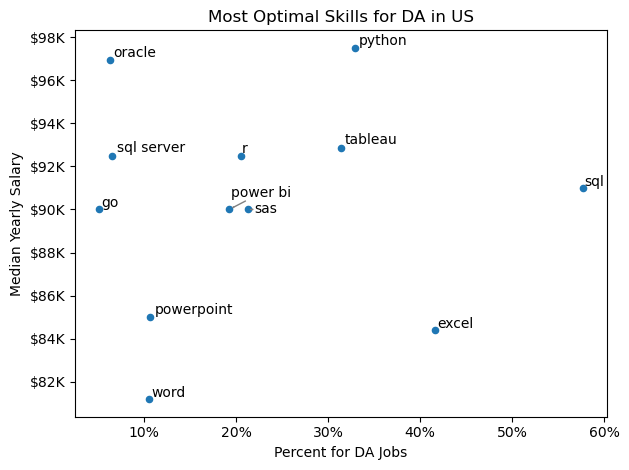

In [21]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_top_skills.plot(kind="scatter", x="skill_percent", y="median_salary")

texts = []

for i, txt in enumerate(df_top_skills.index):
    texts.append(plt.text(df_top_skills["skill_percent"].iloc[i], df_top_skills["median_salary"].iloc[i], txt))  #iloc is used to access the column and row
    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="grey", lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title("Most Optimal Skills for DA in US")
plt.xlabel("Percent for DA Jobs")
plt.ylabel("Median Yearly Salary")
plt.tight_layout()
plt.show()

In [22]:
df_technology = df["job_type_skills"].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

#combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key,value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value
    # remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))
technology_dict



{'analyst_tools': ['outlook',
  'cognos',
  'powerbi',
  'datarobot',
  'power bi',
  'excel',
  'sap',
  'nuix',
  'word',
  'sheets',
  'qlik',
  'dax',
  'splunk',
  'sharepoint',
  'tableau',
  'ms access',
  'ssis',
  'powerpoint',
  'looker',
  'alteryx',
  'sas',
  'ssrs',
  'spreadsheet',
  'visio',
  'msaccess',
  'esquisse',
  'microstrategy',
  'spss'],
 'programming': ['swift',
  't-sql',
  'scala',
  'crystal',
  'pascal',
  'r',
  'julia',
  'powershell',
  'lua',
  'vb.net',
  'fortran',
  'go',
  'haskell',
  'php',
  'c',
  'html',
  'css',
  'groovy',
  'mongodb',
  'assembly',
  'delphi',
  'shell',
  'perl',
  'clojure',
  'rust',
  'dart',
  'mongo',
  'typescript',
  'cobol',
  'java',
  'elixir',
  'c#',
  'solidity',
  'bash',
  'sass',
  'ocaml',
  'javascript',
  'golang',
  'visualbasic',
  'objective-c',
  'erlang',
  'visual basic',
  'apl',
  'sas',
  'sql',
  'nosql',
  'vba',
  'f#',
  'python',
  'no-sql',
  'kotlin',
  'matlab',
  'lisp',
  'ruby',
  '

In [23]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=["technology", "skills"])
df_technology = df_technology.explode("skills")
df_technology

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,cognos
0,analyst_tools,powerbi
0,analyst_tools,datarobot
0,analyst_tools,power bi
...,...,...
9,sync,microsoft teams
9,sync,zoom
9,sync,twilio
9,sync,webex


In [24]:
df_merged = df_top_skills.merge(df_technology, left_on="job_skills", right_on="skills")
df_merged

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


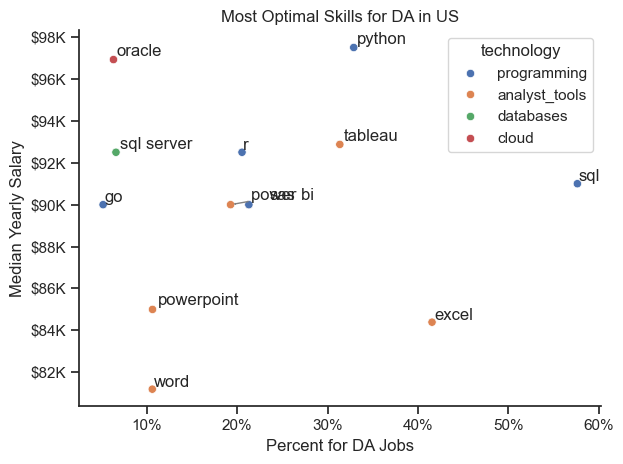

In [ ]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_merged,
    x="skill_percent",
    y="median_salary",
    hue="technology"
)

sns.despine()
sns.set_theme(style="ticks")

texts = []

for i, txt in enumerate(df_top_skills.index):
    texts.append(plt.text(df_top_skills["skill_percent"].iloc[i], df_top_skills["median_salary"].iloc[i], txt))  #iloc is used to access the column and row
    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="grey", lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title("Most Optimal Skills for DA in US")
plt.xlabel("Percent for DA Jobs")
plt.ylabel("Median Yearly Salary")
plt.tight_layout()
plt.show()